In [426]:
# Important libraries

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [427]:
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Big%20Sales%20Data.csv"

# CSV'ni to‘g‘ridan-to‘g‘ri yuklash
df = pd.read_csv(url)

# DataFrame’ni ko‘rsatish
df.head(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


### Data Preprocessing

In [429]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [430]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('median'), inplace=True)



C:\Users\Maftuna\AppData\Local\Temp\ipykernel_18940\688018905.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('median'), inplace=True)


In [431]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Data Visualization

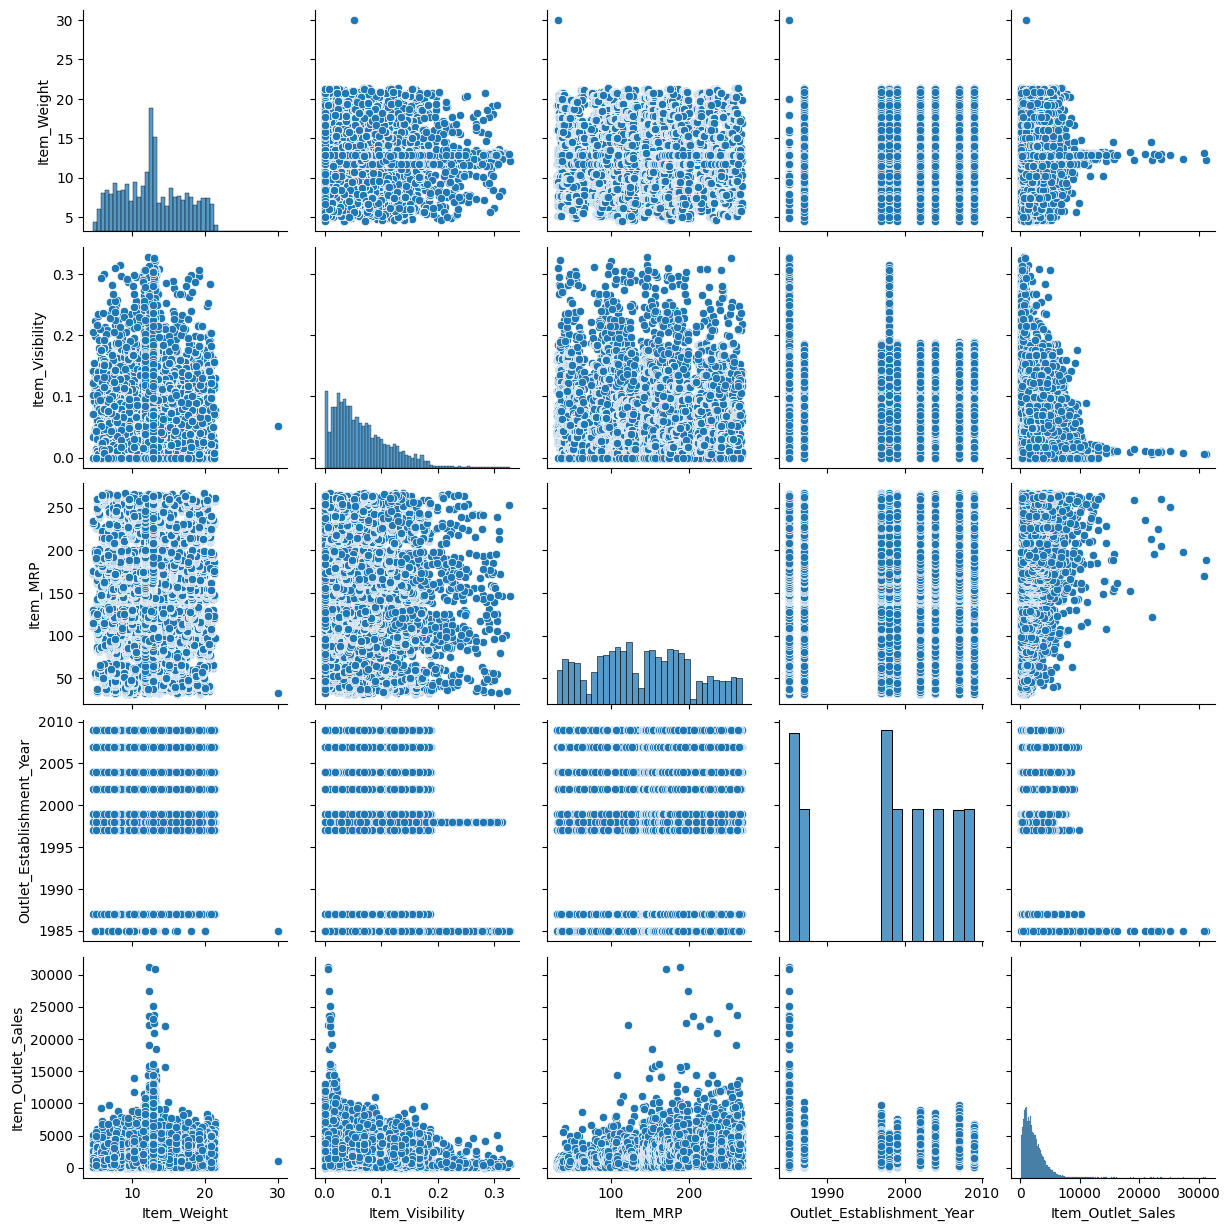

In [432]:
# pair plot 
sns.pairplot(df)


In [433]:
from scipy import stats

# Outlier'larni olib tashlash
df_cleaned = df[np.abs(stats.zscore(df['Item_Outlet_Sales'])) < 2]
X_cleaned = df_cleaned.drop(columns=['Item_Outlet_Sales'])
y_cleaned = df_cleaned['Item_Outlet_Sales']

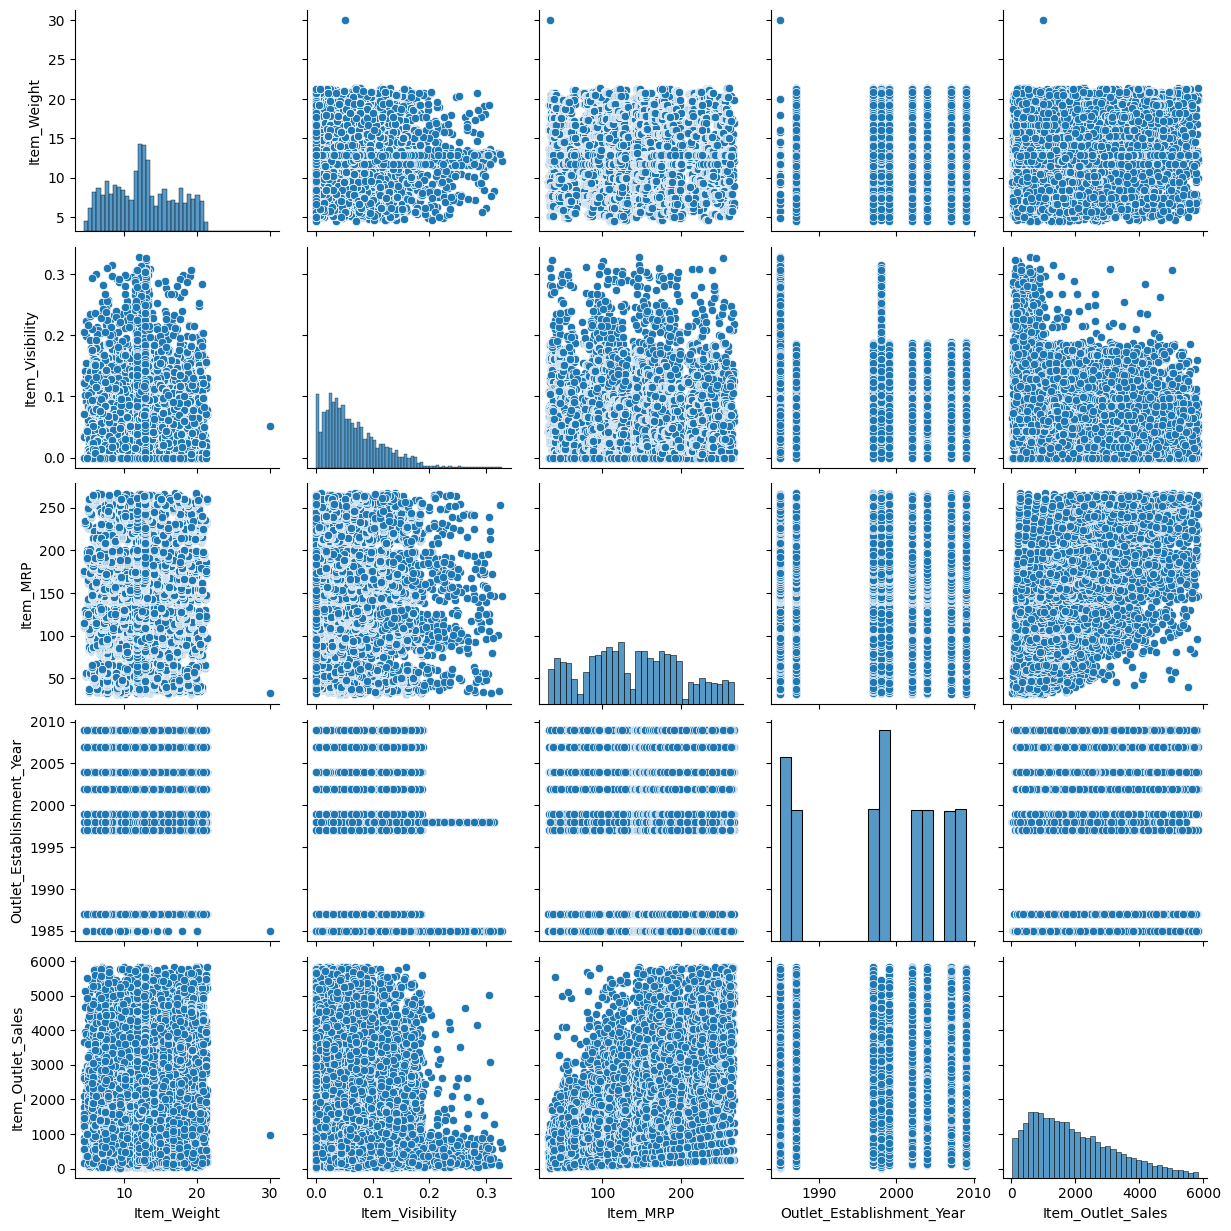

In [434]:
sns.pairplot(df_cleaned)

In [435]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13710 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            13710 non-null  object 
 1   Item_Weight                13710 non-null  float64
 2   Item_Fat_Content           13710 non-null  object 
 3   Item_Visibility            13710 non-null  float64
 4   Item_Type                  13710 non-null  object 
 5   Item_MRP                   13710 non-null  float64
 6   Outlet_Identifier          13710 non-null  object 
 7   Outlet_Establishment_Year  13710 non-null  int64  
 8   Outlet_Size                13710 non-null  object 
 9   Outlet_Location_Type       13710 non-null  object 
 10  Outlet_Type                13710 non-null  object 
 11  Item_Outlet_Sales          13710 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [436]:
X = df_cleaned.drop(columns=['Item_Outlet_Sales'])  # Targetni olib tashlash
y = df_cleaned['Item_Outlet_Sales']  # Target

In [437]:
df_cleaned.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [438]:
df_cleaned.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDG47,12.80,Low Fat,0.069606,Starchy Foods,261.9252,OUT035,2004,Small,Tier 2,Supermarket Type1,4984.178800
14200,FDG47,12.80,Low Fat,0.070013,Starchy Foods,262.8252,OUT017,2007,Medium,Tier 2,Supermarket Type1,2885.577200
14201,FDG47,12.80,Low Fat,0.069561,Starchy Foods,263.0252,OUT013,1987,High,Tier 3,Supermarket Type1,2885.577200
14202,FDG47,12.85,Low Fat,0.069282,Starchy Foods,263.5252,OUT027,1985,Medium,Tier 3,Supermarket Type3,3803.676434
14203,FDG47,12.80,Low Fat,0.069727,Starchy Foods,263.6252,OUT049,1999,Medium,Tier 1,Supermarket Type1,3644.354765


In [439]:
df_cleaned['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8173
Regular    4665
LF          512
reg         190
low fat     170
Name: count, dtype: int64

In [440]:
df_cleaned.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

C:\Users\Maftuna\AppData\Local\Temp\ipykernel_18940\3682624666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)


In [441]:
df_cleaned['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8855
Regular    4855
Name: count, dtype: int64

In [442]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13710 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            13710 non-null  object 
 1   Item_Weight                13710 non-null  float64
 2   Item_Fat_Content           13710 non-null  object 
 3   Item_Visibility            13710 non-null  float64
 4   Item_Type                  13710 non-null  object 
 5   Item_MRP                   13710 non-null  float64
 6   Outlet_Identifier          13710 non-null  object 
 7   Outlet_Establishment_Year  13710 non-null  int64  
 8   Outlet_Size                13710 non-null  object 
 9   Outlet_Location_Type       13710 non-null  object 
 10  Outlet_Type                13710 non-null  object 
 11  Item_Outlet_Sales          13710 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [443]:
df_cleaned.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 2
Item_Visibility              12586
Item_Type                       16
Item_MRP                      7858
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             8703
dtype: int64

In [444]:
for col in df.columns:
    print(f"Ustun: {col}")
    print(df[col].unique(), "\n")


Ustun: Item_Identifier
['FDT36' 'FDP12' 'FDQ36' ... 'FDF11' 'FDD11' 'FDG47'] 

Ustun: Item_Weight
[12.3    9.8    7.855  5.765 10.8    6.715 20.     9.195 19.35   6.8
  7.09  10.395 11.85   4.88  14.1   15.85   7.22   6.71   7.445 12.35
 14.3   14.35  18.    15.5    7.975 13.5    9.395 11.65  20.85   5.425
 17.35  15.1   13.35   8.355  8.195  6.78   7.75   6.445 16.5   20.7
  6.15  16.7    8.3   14.5   14.    11.15   9.6   20.5    8.38  15.6
 17.75  13.3    6.195  6.635 20.6   14.85  12.     9.1   18.7    5.465
 18.85   9.17  10.5    8.315  8.235  5.635 15.15   6.135 11.1    5.26
  6.63  12.6   10.3    5.44  19.7   16.     7.52   5.985  6.035  9.3
 15.75  20.2   12.5    4.92   8.895 15.    12.1    6.215  9.695 12.65
 20.35  20.25  18.2   11.3   15.7   10.195 30.     7.155 10.6   17.6
  7.72  13.15  17.1   16.75  17.85   6.44   6.55  14.8    4.785 11.
  4.635  8.6   12.8    6.575 19.5    5.78  12.15  19.85   5.94   7.05
  5.035 13.65   8.     5.695 17.25  11.6    9.     7.895  6.92  18.

In [445]:
print(df_cleaned['Outlet_Size'].unique())  # Ustunda qanday qiymatlar borligini tekshiramiz
print(df_cleaned['Outlet_Location_Type'].unique())  
print(df_cleaned['Outlet_Type'].unique())  


['Medium' 'Small' 'High']
['Tier 1' 'Tier 2' 'Tier 3']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [446]:
# Label Encoding
le = LabelEncoder()

In [447]:
df_cleaned['Item_Fat_Content'] = le.fit_transform(df_cleaned['Item_Fat_Content'])
df_cleaned['Item_Type'] = le.fit_transform(df_cleaned['Item_Type'])
df_cleaned['Outlet_Identifier'] = le.fit_transform(df_cleaned['Outlet_Identifier'])
df_cleaned['Item_Identifier'] = le.fit_transform(df_cleaned['Item_Identifier'])

C:\Users\Maftuna\AppData\Local\Temp\ipykernel_18940\3728724392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Item_Fat_Content'] = le.fit_transform(df_cleaned['Item_Fat_Content'])
C:\Users\Maftuna\AppData\Local\Temp\ipykernel_18940\3728724392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Item_Type'] = le.fit_transform(df_cleaned['Item_Type'])
C:\Users\Maftuna\AppData\Local\Temp\ipykernel_18940\3728724392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [448]:
# Ordinal Encoding 

df_cleaned['Outlet_Size'] = df_cleaned['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})
df_cleaned['Outlet_Location_Type'] = df_cleaned['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})
df_cleaned['Outlet_Type'] = df_cleaned['Outlet_Type'].map({'Supermarket Type1': 0, 'Supermarket Type2': 1, 'Supermarket Type3': 2, 'Grocery Store': 3})


C:\Users\Maftuna\AppData\Local\Temp\ipykernel_18940\3614351672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Outlet_Size'] = df_cleaned['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})
C:\Users\Maftuna\AppData\Local\Temp\ipykernel_18940\3614351672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Outlet_Location_Type'] = df_cleaned['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})
C:\Users\Maftuna\AppData\Local\Temp\ipykernel_18940\3614351672.py:5: 

In [449]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13710 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            13710 non-null  int64  
 1   Item_Weight                13710 non-null  float64
 2   Item_Fat_Content           13710 non-null  int64  
 3   Item_Visibility            13710 non-null  float64
 4   Item_Type                  13710 non-null  int64  
 5   Item_MRP                   13710 non-null  float64
 6   Outlet_Identifier          13710 non-null  int64  
 7   Outlet_Establishment_Year  13710 non-null  int64  
 8   Outlet_Size                13710 non-null  int64  
 9   Outlet_Location_Type       13710 non-null  int64  
 10  Outlet_Type                13710 non-null  int64  
 11  Item_Outlet_Sales          13710 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 1.4 MB


In [450]:
df_cleaned.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,946,12.3,0,0.111448,0,33.4874,9,1999,1,0,0,436.608721
1,946,12.3,0,0.111904,0,33.9874,2,2007,1,1,0,443.127721
2,946,12.3,0,0.111728,0,33.9874,3,2009,1,2,1,564.598400
3,946,12.3,0,0.000000,0,34.3874,4,1985,0,0,3,1719.370000
4,740,9.8,1,0.045523,0,35.0874,2,2007,1,1,0,352.874000


In [451]:
df_cleaned.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Scaling

In [452]:
scaler = StandardScaler()

In [453]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

C:\Users\Maftuna\AppData\Local\Temp\ipykernel_18940\781273632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])


In [454]:
df_cleaned.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,946,-0.103142,0,0.865691,0,-1.713662,9,0.111214,1,0,0,-1.152808
1,946,-0.103142,0,0.874525,0,-1.705510,2,1.080463,1,1,0,-1.147922
2,946,-0.103142,0,0.871116,0,-1.705510,3,1.322775,1,2,1,-1.056872
3,946,-0.103142,0,-1.291361,0,-1.698988,4,-1.584970,0,0,3,-0.191298
4,740,-0.684684,1,-0.410272,0,-1.687575,2,1.080463,1,1,0,-1.215573


### Clean Data Visualization

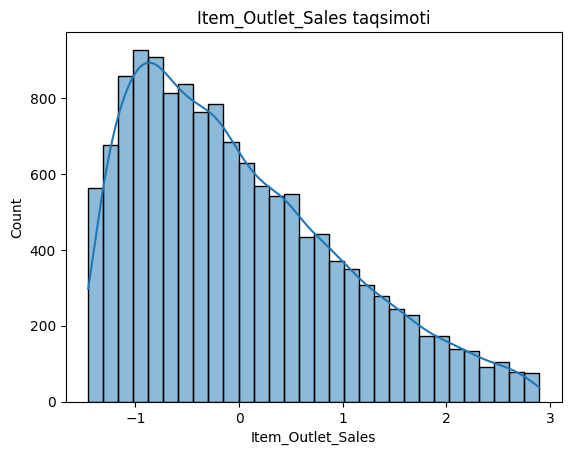

In [455]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Item_Outlet_Sales taqsimoti")
plt.show()


In [456]:
print(df_cleaned['Item_Outlet_Sales'].describe())  # Min qiymati qanday?
print((df_cleaned['Item_Outlet_Sales'] <= 0).sum())  # Nechta 0 yoki manfiy qiymat bor?

count    1.371000e+04
mean    -6.219192e-17
std      1.000036e+00
min     -1.455121e+00
25%     -8.123329e-01
50%     -2.014848e-01
75%      6.389304e-01
max      2.893767e+00
Name: Item_Outlet_Sales, dtype: float64
7841


### Model Process

In [457]:
print("X ustunlari:", X.columns)
print("y ustuni:", y.name)


X ustunlari: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
y ustuni: Item_Outlet_Sales


In [458]:
X_cleaned = df_cleaned.drop(columns=['Item_Outlet_Sales'])
y_cleaned = df_cleaned['Item_Outlet_Sales']

print(X_cleaned.dtypes)  # Yana tekshirib ko'rish


Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year    float64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object


In [472]:
print("X_cleaned shape:", X_cleaned.shape)
print("y_cleaned shape:", y_cleaned.shape)

X_cleaned shape: (13710, 11)
y_cleaned shape: (13710,)


In [475]:
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [476]:
print("X_cleaned_train shape:", X_cleaned_train.shape)
print("X_cleaned_test shape:", X_cleaned_test.shape)
print("y_cleaned_train shape:", y_cleaned_train.shape)
print("y_cleaned_test shape:", y_cleaned_test.shape)

X_cleaned_train shape: (10968, 11)
X_cleaned_test shape: (2742, 11)
y_cleaned_train shape: (10968,)
y_cleaned_test shape: (2742,)


### Training

In [478]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model

RandomForestRegressor(random_state=42)

In [480]:
rfr = model.fit(X_cleaned_train, y_cleaned_train)

In [481]:
rfr

RandomForestRegressor(random_state=42)

#### Get Model Prediction

In [482]:
y_cleaned_pred = rfr.predict(X_cleaned_test)

In [483]:
y_cleaned_pred

array([-0.89364538, -0.83596814,  0.46863901, ...,  0.35519342,
       -0.5480519 ,  0.75865612], shape=(2742,))

In [485]:
mse = mean_squared_error(y_cleaned_test, y_cleaned_pred)
r2 = rfr.score(X_cleaned_test, y_cleaned_test)


In [486]:
print("Mean Squared Error:", mse)
print("R^2:", r2)

Mean Squared Error: 0.5028601704760302
R^2: 0.501898730346039


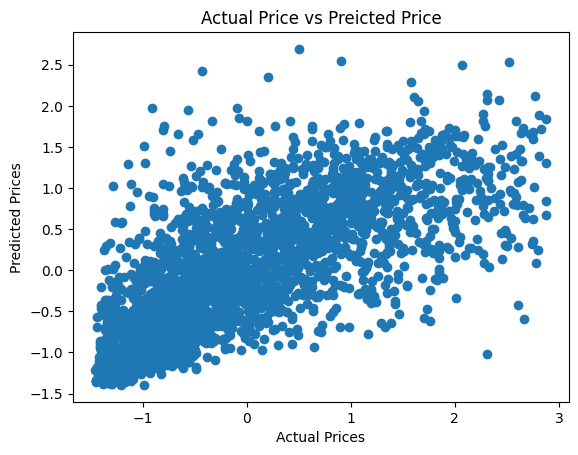

In [487]:
import matplotlib.pyplot as plt
plt.scatter(y_cleaned_test, y_cleaned_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()
